[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


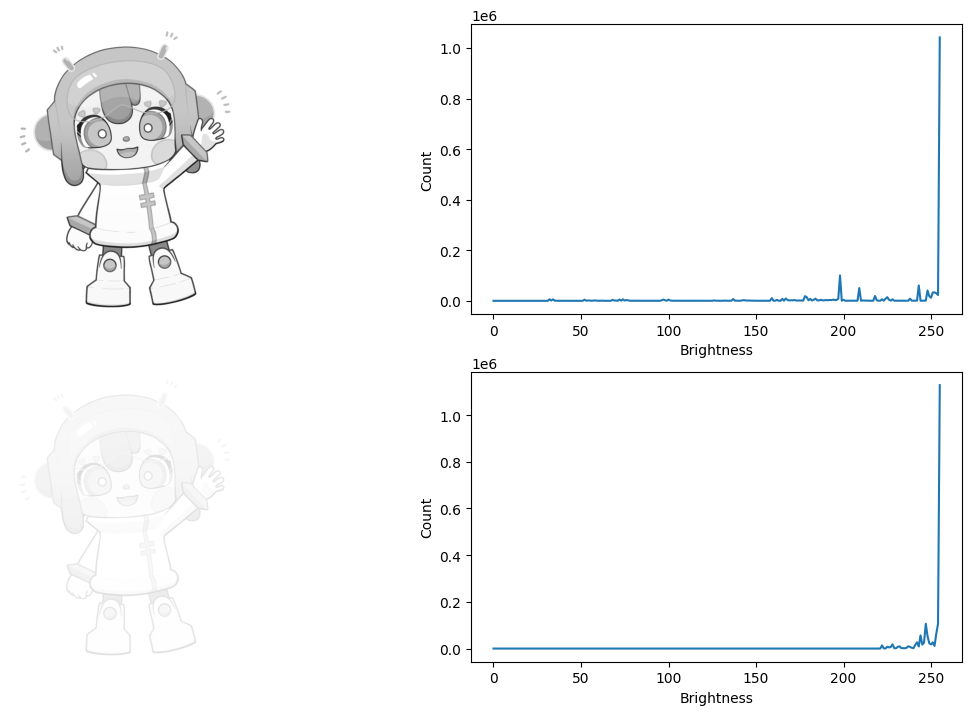

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 画像の読み込み
image = cv2.imread("picody_gray.png", cv2.IMREAD_GRAYSCALE)

print(image)

# 入力画像のヒストグラムの作成（引数の'image'を[ ]で囲うことを忘れないで下さい）
histogram1 = cv2.calcHist([image], [0], None, [256], [0, 256])


# 正規化
lower = 220  # 正規化の下限値
upper = 255  # 正規化の上限値
result = cv2.normalize(image, None, alpha=lower, beta=upper, norm_type=cv2.NORM_MINMAX)

# 正規化後の画像のヒストグラムの作成
histogram2 = cv2.calcHist([result], [0], None, [256], [0, 256])


# ヒストグラムの可視化
plt.rcParams["figure.figsize"] = [12, 7.5]  # 表示領域のアスペクト比を設定
title = (
    "cv2.normalize (alpha="
    + str(lower)
    + ", beta="
    + str(upper)
    + ", norm_type=cv2.NORM_MINMAX"
    + "): codevace.com"
)
plt.figure(title)  # ウィンドウタイトルを設定
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.10, top=0.95)  # 余白を設定
plt.subplot(221)  # 1行2列の1番目の領域にプロットを設定
plt.imshow(
    image, vmin=0, vmax=255, cmap="gray"
)  # 画像をグレースケールで表示、最大値・最小値を指定
plt.axis("off")  # 軸目盛、軸ラベルを消す
plt.subplot(222)  # 1行2列の2番目の領域にプロットを設定
plt.plot(histogram1)  # ヒストグラムのグラフを表示
plt.xlabel("Brightness")  # x軸ラベル(明度)
plt.ylabel("Count")  # y軸ラベル(画素の数)

# ヒストグラムの可視化
plt.subplot(223)  # 1行2列の3番目の領域にプロットを設定
plt.imshow(
    result, vmin=0, vmax=255, cmap="gray"
)  # 画像をグレースケールで表示、最大値・最小値を指定
plt.axis("off")  # 軸目盛、軸ラベルを消す
plt.subplot(224)  # 1行2列の4番目の領域にプロットを設定
plt.plot(histogram2)  # ヒストグラムのグラフを表示
plt.xlabel("Brightness")  # x軸ラベル(明度)
plt.ylabel("Count")  # y軸ラベル(画素の数)
plt.show()

# 画像の保存
cv2.imwrite("picody_gray_normalized.png", result)
